In [69]:
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras import models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from keras.models import Model

from keras.layers import BatchNormalization

from keras.layers import MaxPooling2D

from keras.layers import concatenate

from keras.layers import Lambda, Flatten, Dense

from keras.initializers import glorot_uniform

from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.regularizers import l2

import keras.backend as K

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [65]:
!unzip Hindi.zip

Archive:  Hindi.zip
replace Hindi/001/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [70]:
path_hindi = "/content/Hindi/"

In [71]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path_hindi))[1]
dir_list.sort()

In [72]:
data_groups = []
for directory in dir_list:
    images = os.listdir(path_hindi+directory)
    images.sort()
    images = [path_hindi+directory+'/'+x for x in images]
    data_groups.append(images)

In [ ]:
!unzip Bengali.zip

Archive:  Bengali.zip
   creating: Bengali/001/
  inflating: Bengali/001/.DS_Store   
  inflating: Bengali/001/B-S-1-F-01.tif  
  inflating: Bengali/001/B-S-1-F-02.tif  
  inflating: Bengali/001/B-S-1-F-03.tif  
  inflating: Bengali/001/B-S-1-G-01.tif  
  inflating: Bengali/001/B-S-1-G-02.tif  
  inflating: Bengali/001/B-S-1-G-03.tif  


In [ ]:
path_bengali = "/content/Bengali/"

In [73]:
dir_list = next(os.walk(path_bengali))[1]
dir_list.sort()

In [74]:
for directory in dir_list:
    images = os.listdir(path_bengali+directory)
    images.sort()
    images = [path_bengali+directory+'/'+x for x in images]
    data_groups.append(images)

In [75]:
len(data_groups)

2

In [76]:
data_lengths = [len(x) for x in data_groups]
print(data_lengths)

[7, 7]


**Train Validation Test Split**

In [77]:
train, test = train_test_split(data_groups, test_size=0.04, train_size=0.96, random_state=1)
train, val = train_test_split(train, test_size=0.04, train_size=0.96, random_state=1)

ValueError: ignored

In [ ]:
train_size = len(train)
test_size = len(test)
val_size = len(val)
print(len(train), len(val), len(test))

NameError: ignored

In [ ]:
#del data_groups

In [80]:
img_h, img_w = 155, 220

In [82]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    k = np.random.randint(len(train))
    img_names = random.sample(train[k], 2)
    label1 = 0 if "F" in img_names[0] else 1
    label2 = 0 if "F" in img_names[1] else 1
    img1 = cv2.imread(img_names[0], 0)
    img2 = cv2.imread(img_names[1], 0)
    img1 = cv2.resize(img1, (img_w, img_h))
    img2 = cv2.resize(img2, (img_w, img_h))

    ax1.imshow(img1, cmap = 'gray')
    ax2.imshow(img2, cmap = 'gray')

    ax1.set_title('Genuine Copy' if label1 == 1 else 'Forged Copy')
    ax1.axis('off')
    ax2.set_title('Genuine Copy' if label2 == 1 else 'Forged Copy')
    ax2.axis('off')
    plt.show()

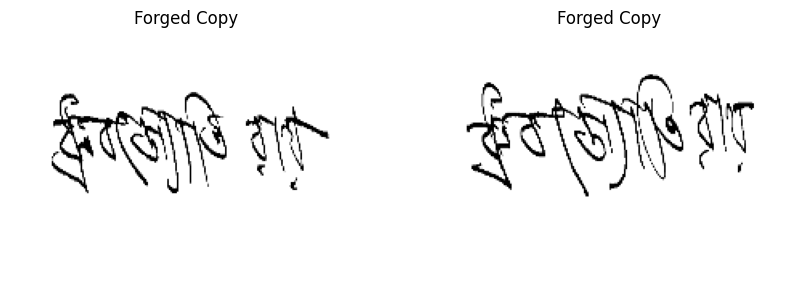

In [83]:
visualize_sample_signature()